<a href="https://colab.research.google.com/github/gabrielborja/python_data_analysis/blob/main/molding_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import packages

In [1]:
#Importing necessary packages
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
#Customizing data visualization styles

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title

In [ ]:
#Customizing style
plt.style.use(['seaborn'])

#Hanging pieces

##Uploading necessary packages

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (15, 5)})

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

Saving 2021-05-20 16_3_count.csv to 2021-05-20 16_3_count.csv


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['2021-05-20 16_3_count.csv']), parse_dates=['Time'])

In [ ]:
#Checking stored dataframe
df.tail(2)

,Time,Num
397,2021-05-20 16:31:43,1
398,2021-05-20 16:32:02,1


In [ ]:
#Checking the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    399 non-null    datetime64[ns]
 1   Num     399 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB


In [ ]:
#Performing preliminary statistical analysis
df.describe()

,Num
count,399.000000
mean,2.233083
std,1.600348
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,12.000000


## EDA Hanging pieces

In [ ]:
#Calculating the cumulative sum
df = df.assign(Cum_heng = lambda x: x['Num'].cumsum())
df.tail(2)

,Time,Num,Cum_heng
397,2021-05-20 16:31:43,1,890
398,2021-05-20 16:32:02,1,891


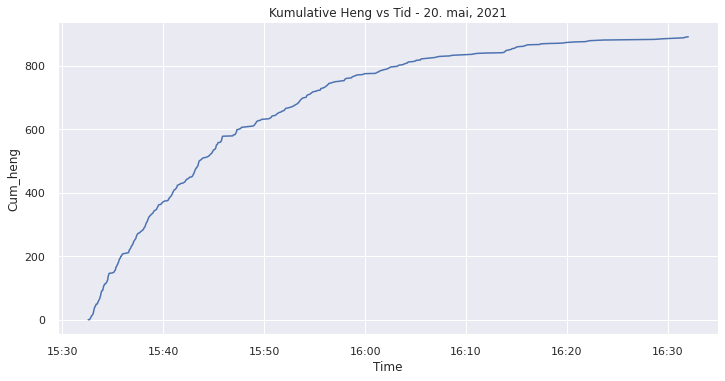

In [ ]:
#Plotting the cumulative count of hanging pieces vs. time
g1 = sns.relplot(data=df, x='Time', y='Cum_heng', kind='line', aspect = 2.0)
xformatter = mdates.DateFormatter("%H:%M")
g1.axes[0,0].xaxis.set_major_formatter(xformatter)
plt.title('Kumulative Heng vs Tid - 20. mai, 2021')
plt.show()

In [ ]:
#Calculating the time delta for the test
df['Time'].iloc[-1] - df['Time'].iloc[0]

Timedelta('0 days 00:59:29')

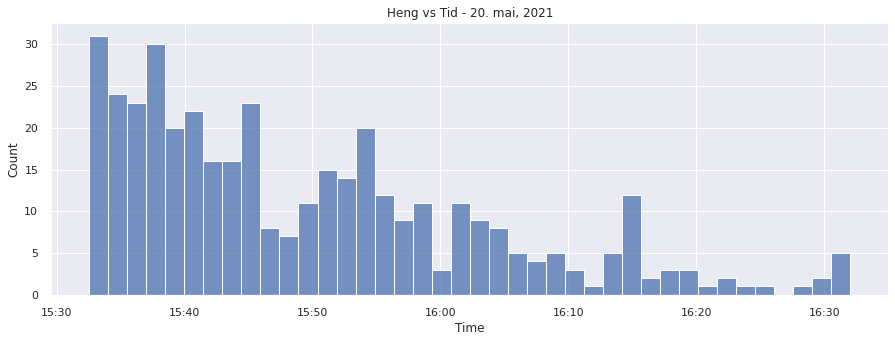

In [ ]:
#Plotting a histogram of the hanging pieces vs. time
g2 = sns.histplot(data=df['Time'], bins=40)
xformatter = mdates.DateFormatter("%H:%M")
g2.xaxis.set_major_formatter(xformatter)
plt.title('Heng vs Tid - 20. mai, 2021')
plt.show()

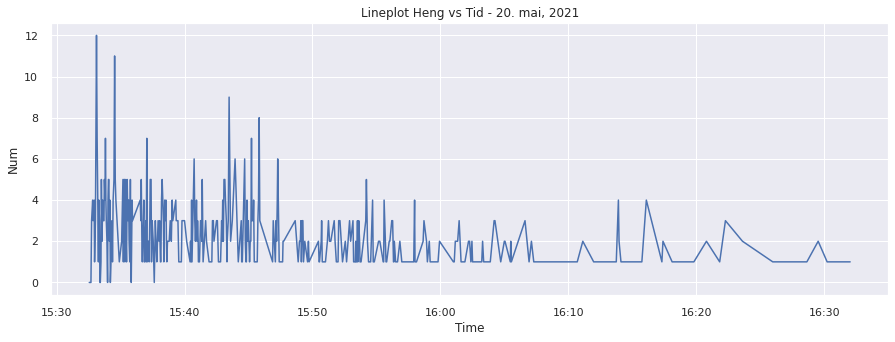

In [ ]:
#Scatterplot of the hanging pieces vs time
g3 = sns.lineplot(data=df, x='Time', y='Num')
xformatter = mdates.DateFormatter("%H:%M")
g3.xaxis.set_major_formatter(xformatter)
plt.title('Lineplot Heng vs Tid - 20. mai, 2021')
plt.show()

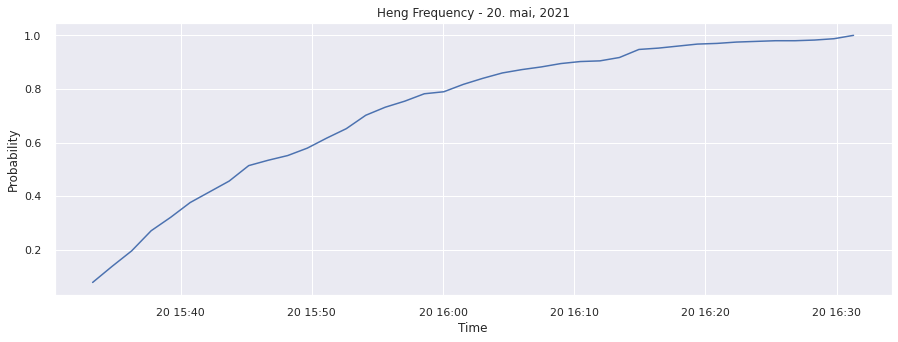

In [ ]:
#Plotting the probability of the hanging pieces per size
sns.histplot(data=df['Time'], stat='probability', bins=40, cumulative=True, element="poly", fill=False, )
plt.title('Heng Frequency - 20. mai, 2021')
plt.show()

In [ ]:
#Categorize Hanging pieces by size
def cat_size(heng):
  return ["small" if i <= 5 else "medium" if i <= 10 else "large" for i in heng]

df = df.assign(Category = cat_size(df['Num']))
df.tail(10)

,Time,Num,Cum_heng,Category
389,2021-05-20 16:23:37,2,881,small
390,2021-05-20 16:25:59,1,882,small
391,2021-05-20 16:28:39,1,883,small
392,2021-05-20 16:29:32,2,885,small
393,2021-05-20 16:30:14,1,886,small
394,2021-05-20 16:30:57,1,887,small
395,2021-05-20 16:31:34,1,888,small
396,2021-05-20 16:31:40,1,889,small
397,2021-05-20 16:31:43,1,890,small
398,2021-05-20 16:32:02,1,891,small


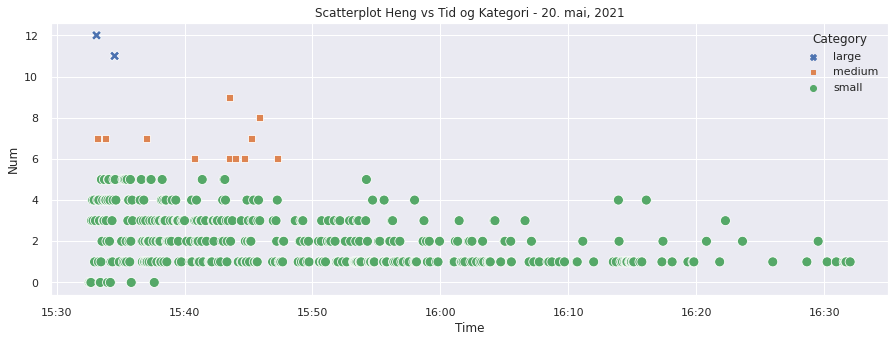

In [ ]:
#Scatterplot of the hanging pieces vs time and category
g4 = sns.scatterplot(data=df, x='Time', y='Num', hue='Category', style='Category', s=100, hue_order=['large', 'medium', 'small'])
xformatter = mdates.DateFormatter("%H:%M")
g4.xaxis.set_major_formatter(xformatter)
plt.title('Scatterplot Heng vs Tid og Kategori - 20. mai, 2021')
plt.show()

#Depositor Analysis

## Uploading necessary packages

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (8, 4)})

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df = pd.read_excel(io.BytesIO(uploaded['2021-01-25-mk_heng_ab.xlsx']))

In [ ]:
#Checking stored dataframe
df = df.rename(columns={'Bit': 'Heng'})
df['Cat'] = df['Cat'].astype('category')
df.tail(2)

,Time,Cat,Heng
133,2021-01-25 12:43:01.458,Up_form,3.49
134,2021-01-25 12:43:07.951,Up_form,3.53


In [ ]:
#Checking the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    135 non-null    datetime64[ns]
 1   Cat     135 non-null    category      
 2   Heng    135 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [ ]:
#Dropping outliers
df = df[df['Heng'] < 3.70].reset_index(drop=True)
df.tail(2)

,Time,Cat,Heng
133,2021-01-25 12:43:01.458,Up_form,3.49
134,2021-01-25 12:43:07.951,Up_form,3.53


In [ ]:
#Performing statistical analysis of weight
df['Heng'].describe()

count    135.000000
mean       3.537704
std        0.043037
min        3.460000
25%        3.510000
50%        3.530000
75%        3.570000
max        3.650000
Name: Heng, dtype: float64

## EDA Bit Weight

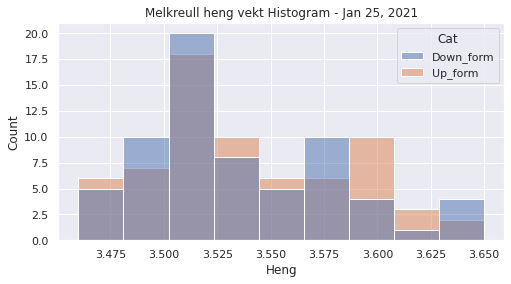

In [ ]:
#Plotting the histogram of the weights
sns.histplot(data=df, x='Heng', hue='Cat')
plt.title('Mk heng vekt Histogram - Jan 25, 2021')
plt.show()

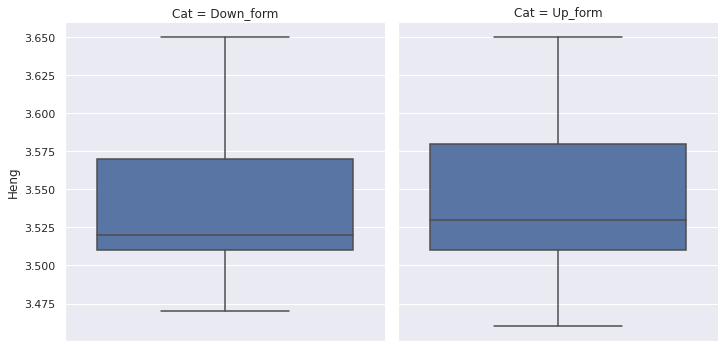

In [ ]:
#Plotting the Boxplot of the weights
sns.catplot(data=df, y='Heng', kind='box', col='Cat')
#plt.title('Mk heng vekt Boxplot - Jan 25, 2021')
plt.show()

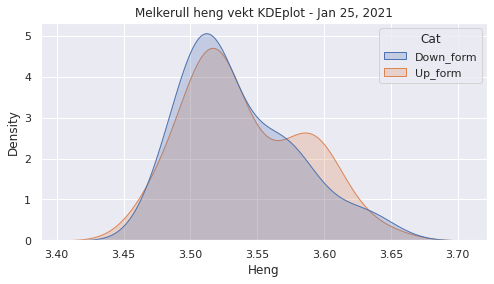

In [ ]:
#Plotting the KDEplot of the weights
sns.kdeplot(data=df, x='Heng', hue='Cat', shade=True)
plt.title('Mk heng vekt KDEplot - Jan 25, 2021')
plt.show()

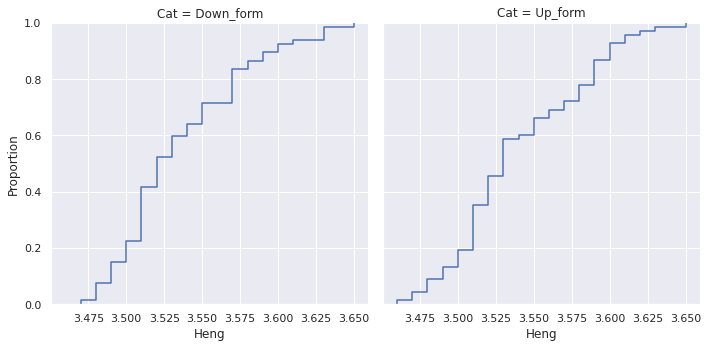

In [ ]:
#Plotting the cum distribution plot of the weights
sns.displot(data=df, x='Heng', kind='ecdf', col='Cat')
#plt.title('Cum Distribution Mk heng vekt - Jan 25, 2021')
plt.show()

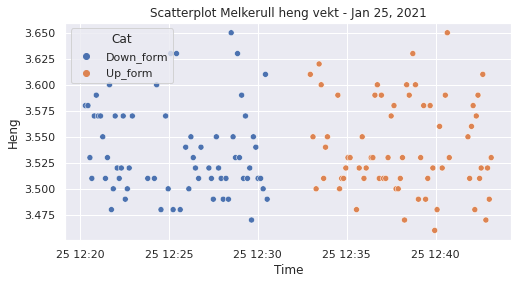

In [ ]:
#Plotting the scatter plot of weights against time
sns.scatterplot(data=df, x='Time', y='Heng', hue='Cat')
plt.title('Scatterplot Melkerull heng vekt - Jan 25, 2021')
plt.show()

## Depositor statistical tests

In [ ]:
#Importing statistical package
from scipy import stats

In [ ]:
#1-sample t-test: testing the value of the population mean
stats.ttest_1samp(a=df['Heng'], popmean=3.52)

Ttest_1sampResult(statistic=4.779614792837874, pvalue=4.553981326283824e-06)

With a pvalue of 4.554e-06, we can infer that the population mean for the sample is not 3.52 grams

In [ ]:
#2-sample t-test: testing for difference across populations
down_form = df[df['Cat'] == 'Down_form']['Heng']
up_form = df[df['Cat'] == 'Up_form']['Heng']
stats.ttest_ind(a=down_form, b=up_form)

Ttest_indResult(statistic=-0.5831202144454928, pvalue=0.5607998235157677)

With a pvalue of 0.56, we can infer that the population mean between the samples is similar

#Filling Analysis

## Import data

In [ ]:
#Importing necessary packages
import matplotlib.dates as mdates

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded3 = files.upload()

Saving 2021-04-26_depositor_j4.csv to 2021-04-26_depositor_j4 (4).csv


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df3 = pd.read_csv(io.BytesIO(uploaded3['2021-04-26_depositor_j4.csv']), parse_dates=['Time'])

In [ ]:
#Info
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        321 non-null    datetime64[ns]
 1   Dep_temp    321 non-null    float64       
 2   %_filled    321 non-null    int64         
 3   Mold_temp   321 non-null    float64       
 4   Line_speed  321 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 12.7 KB


In [ ]:
#Checking the molding line speed
df3['Line_speed'].describe()

count    321.000000
mean      26.398442
std        0.176327
min       25.600000
25%       26.300000
50%       26.400000
75%       26.500000
max       26.900000
Name: Line_speed, dtype: float64

## Filling EDA

In [ ]:
#Plotting the parameters of the depositor
def plot_depo():
  """Plot the filling parameters against time"""

  #Date formatter
  xformatter = mdates.DateFormatter('%H:%M:%S')

  #Create subplots and unpack the output array immediately
  fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

  #Set title for the figure
  fig.suptitle("Filling parameters of Depositor N°2, April 26, 2021")

  #Creating constants for plotting
  p_colors = ['#C0C0C0', '#4374B3', '#FF0B04']

  #Accessing axes objects and plotting
  sns.lineplot(x='Time', y='Dep_temp', data=df3, ci=False, label='Depositor_temp', ax=ax1)
  sns.lineplot(x='Time', y='Mold_temp', data=df3, ci=False, label='Mold_temp', ax=ax1)
  sns.lineplot(x='Time', y='%_filled', data=df3, ci=False, label='%Level_filled', palette='#ffffff', ax=ax2)
  sns.lineplot(x='Time', y='Line_speed', data=df3, ci=False, label='Molds/min', ax=ax3)
  
  #Customizing axes labels and titles for first axes figure
  ax1.set_xlabel('Time')
  ax1.set_ylabel('Temp °C')
  ax1.set_title('Depositor 2 Temperatures')
  ax1.xaxis.set_major_formatter(xformatter)
  ax1.yaxis.set_ticks(np.arange(18, 36, 2))
  
  #Customizing axes labels and titles for first axes figure
  ax2.set_xlabel('Time')
  ax2.set_ylabel('% Filled')
  ax2.set_title('% Level in the Depositor 2')
  ax2.xaxis.set_major_formatter(xformatter)
  ax2.yaxis.set_ticks(np.arange(54, 74, 2))

  #Customizing axes labels and titles for first axes figure
  ax3.set_xlabel('Time')
  ax3.set_ylabel('Molds/min')
  ax3.set_title('Molding Line Speed')
  ax3.xaxis.set_major_formatter(xformatter)
  ax3.yaxis.set_ticks(np.arange(25.4, 27.4, 0.2))

  #Prevent from axis to colliding or overlaping one another.
  fig.tight_layout()
  fig.subplots_adjust(top=0.88)

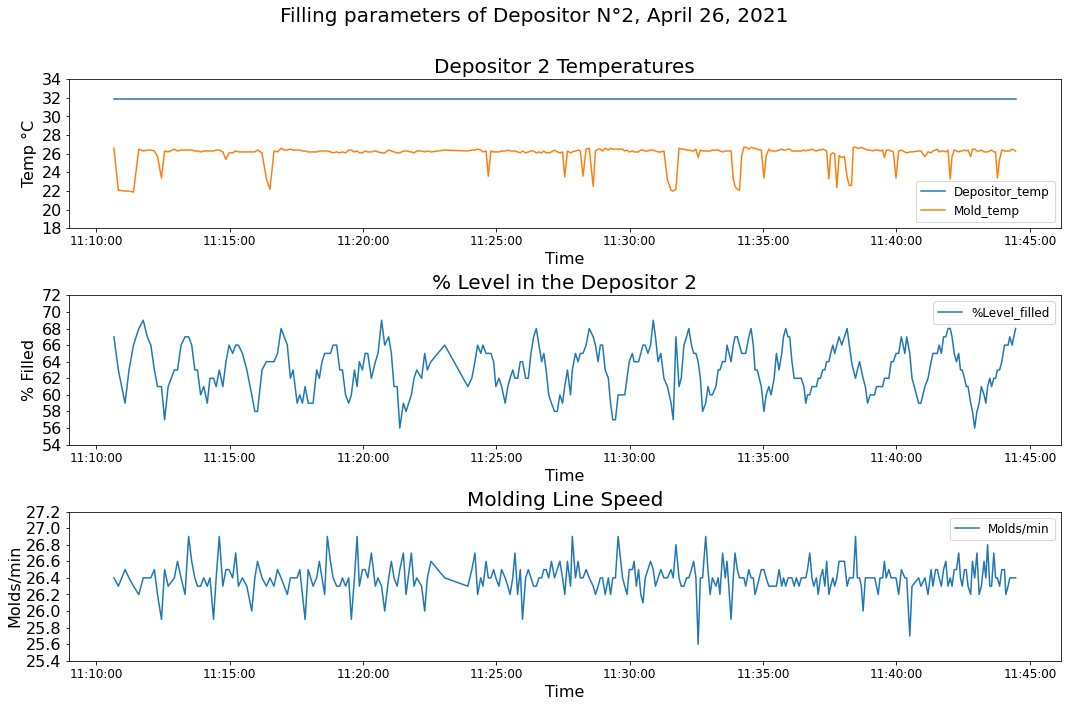

In [ ]:
#Plotting the filling parameters
plot_depo()
plt.show()

# Missing Molds

## Importing necessary packages and data

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (12, 5)})

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded4 = files.upload()

Saving 2021-06-14 10_0_count.csv to 2021-06-14 10_0_count.csv


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df4 = pd.read_csv(io.BytesIO(uploaded4['2021-06-14 10_0_count.csv']), parse_dates=['Time'])

In [ ]:
#Checking stored dataframe
df4 = df4.rename(columns={'Num': 'Molds'})
df4.tail(3)

,Time,Molds
28,2021-06-14 09:54:39.463552,1
29,2021-06-14 09:54:41.685580,1
30,2021-06-14 10:01:43.683547,0


In [ ]:
#Checking the dataframe information
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    31 non-null     datetime64[ns]
 1   Molds   31 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 624.0 bytes


## Missing molds EDA

In [ ]:
#Creating a copy of the dataframe and counting categorical values
df4['Molds'].value_counts()

1    29
0     2
Name: Molds, dtype: int64

In [ ]:
#Calculating the cumulative sum and GE Loss
df4 = df4.assign(Missing_molds = lambda x: x['Molds'].cumsum())
df4 = df4.assign(GE_loss = lambda y: (round(y['Missing_molds']/1154, 3))*100)
df4.tail(3)

,Time,Molds,Missing_molds,GE_loss
28,2021-06-14 09:54:39.463552,1,28,2.4
29,2021-06-14 09:54:41.685580,1,29,2.5
30,2021-06-14 10:01:43.683547,0,29,2.5


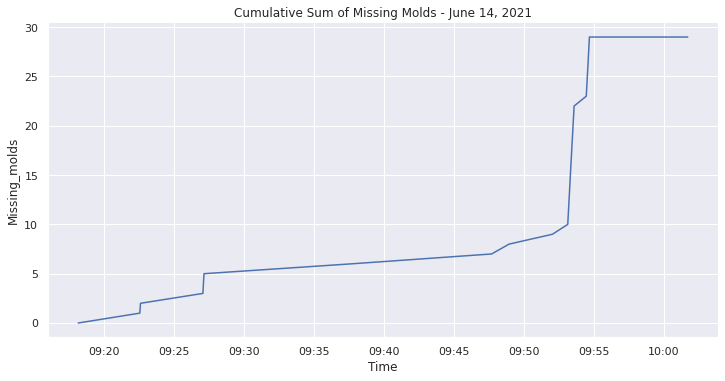

In [ ]:
#Plotting the cumulative count of missing molds vs. time
g1 = sns.relplot(data=df4, x='Time', y='Missing_molds', kind='line', aspect=2.0)
xformatter = mdates.DateFormatter("%H:%M")
g1.axes[0,0].xaxis.set_major_formatter(xformatter)
plt.title('Cumulative Sum of Missing Molds - June 14, 2021')
plt.show()

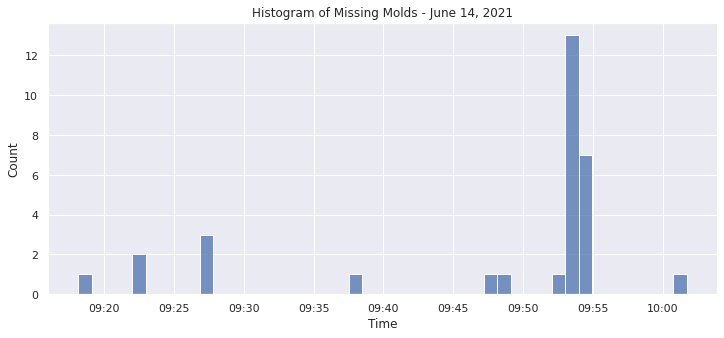

In [ ]:
#Plotting a histogram of the missing forms vs. time
g2 = sns.histplot(data=df4, x='Time', bins=45)
xformatter = mdates.DateFormatter("%H:%M")
g2.xaxis.set_major_formatter(xformatter)
plt.title('Histogram of Missing Molds - June 14, 2021')
plt.show()

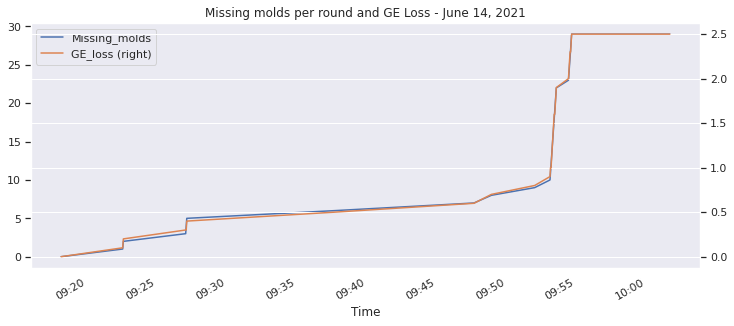

In [ ]:
#Plotting the missing forms and GE Loss in secondary axis
ax = df4.plot(x='Time', y='Missing_molds')
df4.plot(x='Time', y='GE_loss', secondary_y=True, ax=ax)
xformatter = mdates.DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(xformatter)
plt.title("Missing molds per round and GE Loss - June 14, 2021")
plt.show()

In [ ]:
#Time for a full cycle of the molding line
df4['Time'].iloc[-1] - df4['Time'].iloc[0]

Timedelta('0 days 00:43:34.761026')

#Mold crashes

## Uploading data

In [2]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (12, 5)})

In [3]:
#Uploading file from local drive
from google.colab import files
uploaded5 = files.upload()

Saving 2021_j4_krasjer.xlsx to 2021_j4_krasjer.xlsx


In [4]:
#Storing dataset in a Pandas Dataframe
import io
df5 = pd.read_excel(io.BytesIO(uploaded5['2021_j4_krasjer.xlsx']), index_col='Event')

In [5]:
#checking the dataframe info
df5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 2020-01-02 18:00:00 to 2021-06-14 19:15:00
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Dato       113 non-null    datetime64[ns]
 1   Start      113 non-null    object        
 2   Avslutt    113 non-null    object        
 3   Min_tapt   113 non-null    float64       
 4   Skift      113 non-null    object        
 5   Operasjon  113 non-null    object        
 6   Produkt    113 non-null    object        
 7   Group      113 non-null    object        
 8   Dør        113 non-null    object        
 9   Full_tom   47 non-null     object        
 10  Tatt_ut    47 non-null     float64       
 11  Navn       113 non-null    object        
 12  Comment    11 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 12.4+ KB


In [6]:
#Filtering the dataframe to match the last 24 hours
s = '2021-01-05 07:00:00'
f = '2021-06-18 07:00:00'
df5_f = df5[s : f].copy()
df5_f.index[0], df5_f.index[-1]

(Timestamp('2021-01-19 12:00:00'), Timestamp('2021-06-14 19:15:00'))

In [ ]:
#Creating a copy of the dataframe and dropping columns with missing data
cr = df5_f.copy()
cr = cr.drop(columns=['Full_tom', 'Tatt_ut', 'Comment'], axis=1).reset_index()
cr.head()

In [ ]:
#Customizing the time to categorical for easy groupying
cr = cr.assign(Timer = cr['Event'].dt.hour)
cr = cr.assign(Måned = cr['Event'].dt.month_name())
cr = cr.assign(År = cr['Event'].dt.year)
cr.tail()

## Crashes EDA

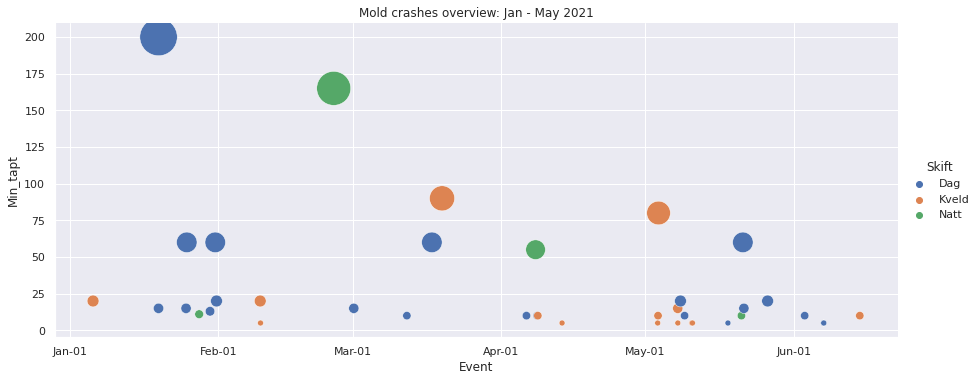

In [13]:
#Plotting the minutes and crashes against time
g5_1= sns.relplot(x='Event', y='Min_tapt', data=cr, hue='Skift', hue_order=['Dag', 'Kveld', 'Natt'], height=5, aspect=2.5, s=cr.Min_tapt*7, linewidths=1, edgecolors='k')
xformatter = mdates.DateFormatter("%b-%d")
g5_1.axes[0,0].xaxis.set_major_formatter(xformatter)
plt.title('Mold crashes overview: Jan - May 2021')
plt.show()

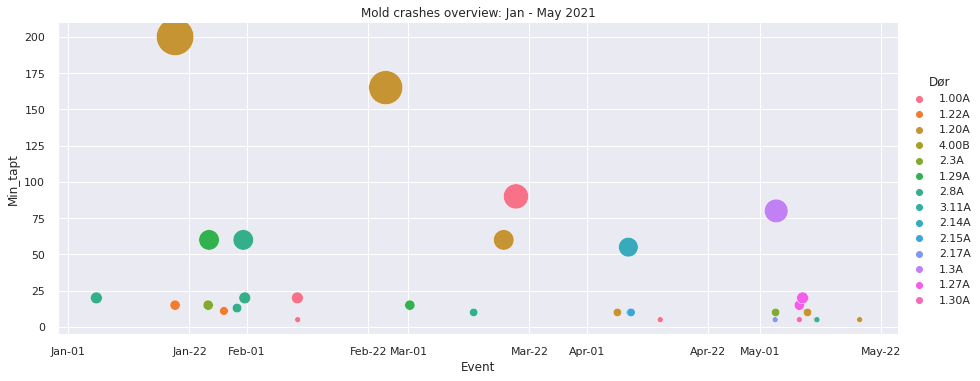

In [ ]:
#Plotting the minutes and crashes against time
g5_2= sns.relplot(x='Event', y='Min_tapt', data=cr, hue='Dør', height=5, aspect=2.5, s=cr.Min_tapt*7, linewidths=1, edgecolors='k')
xformatter = mdates.DateFormatter("%b-%d")
g5_2.axes[0,0].xaxis.set_major_formatter(xformatter)
plt.title('Mold crashes overview: Jan - May 2021')
plt.show()

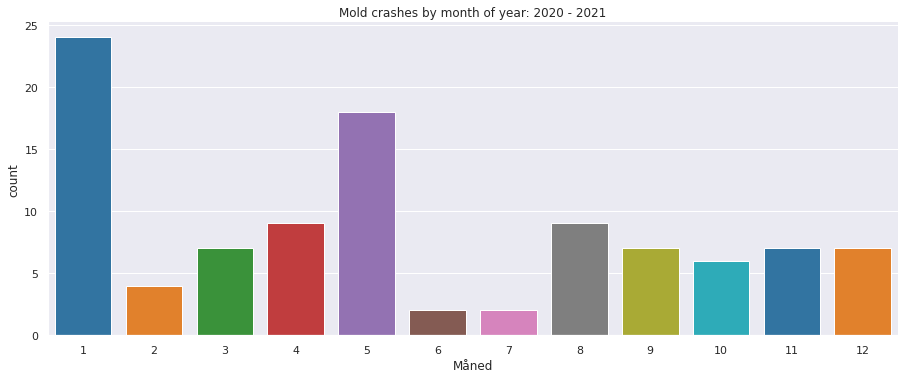

In [ ]:
#Plotting the relationship between crashes and year of the month
sns.catplot(x='Måned', data=cr, kind='count', height=5.0, aspect=2.5, palette='tab10')
plt.title('Mold crashes by month of year: 2020 - 2021')
plt.show()

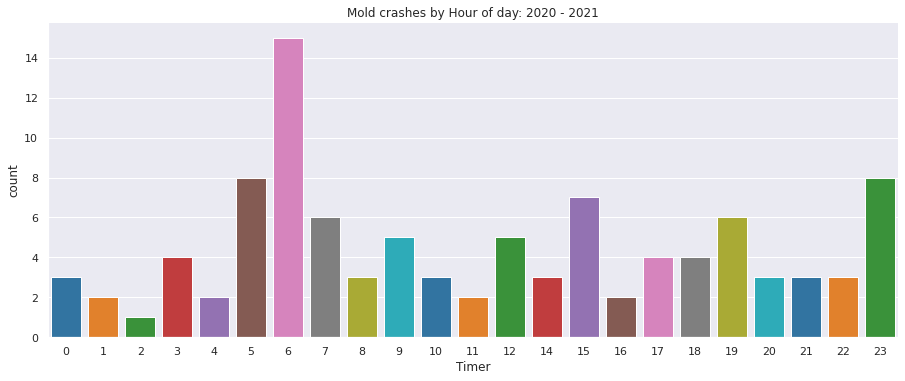

In [ ]:
#Plotting the relationship between hours of day and mold crashes
sns.catplot(x='Timer', data=cr, kind='count', height=5.0, aspect=2.5, palette='tab10')
plt.title('Mold crashes by Hour of day: 2020 - 2021')
plt.show()

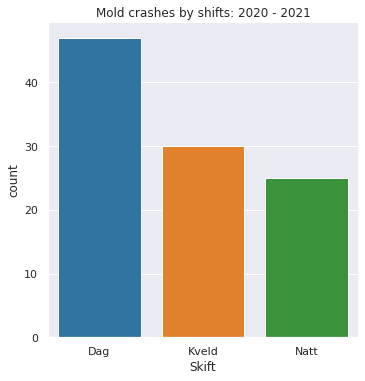

In [ ]:
#Plotting the relationship between shifts and mold crashes
sns.catplot(x='Skift', data=cr, kind='count', order=['Dag', 'Kveld', 'Natt'], height=5.0, aspect=1.0, palette='tab10')
plt.title('Mold crashes by shifts: 2020 - 2021')
plt.show()

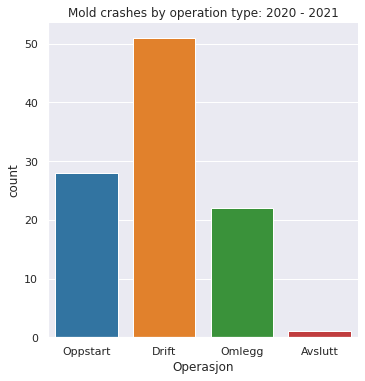

In [ ]:
#Plotting the relationship between operation type and mold crashes
sns.catplot(x='Operasjon', data=cr, kind='count', height=5.0, aspect=1.0, palette='tab10')
plt.title('Mold crashes by operation type: 2020 - 2021')
plt.show()

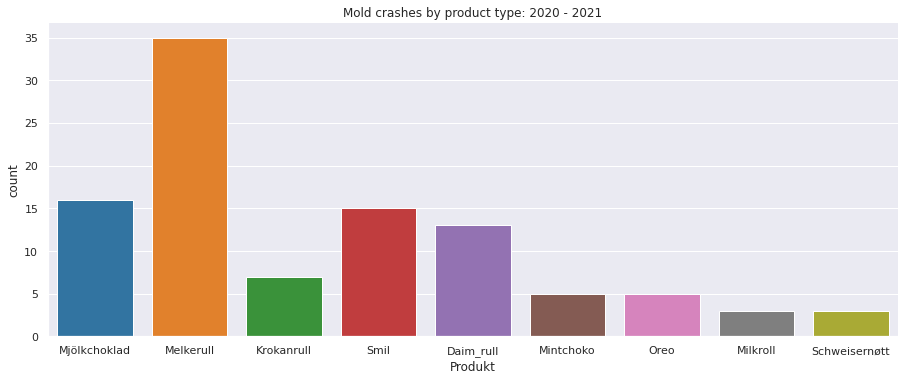

In [ ]:
#Plotting the relationship between product type and mold crashes
sns.catplot(x='Produkt', data=cr, kind='count', height=5.0, aspect=2.5, palette='tab10')
plt.title('Mold crashes by product type: 2020 - 2021')
plt.show()

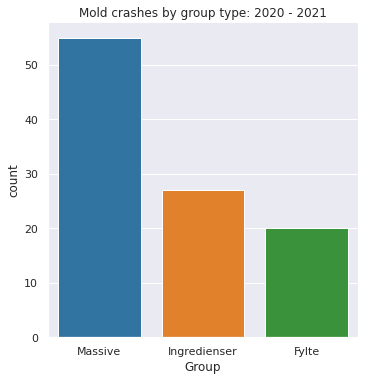

In [ ]:
#Plotting the relationship between group type and mold crashes
sns.catplot(x='Group', data=cr, kind='count', height=5.0, aspect=1.0, palette='tab10')
plt.title('Mold crashes by group type: 2020 - 2021')
plt.show()

In [10]:
#Aggregating the door count by highest to lowest 
door = cr[['Dør', 'Event']].copy()
door = door.groupby('Dør').count().sort_values(by='Event', ascending=False).reset_index()
door.head()

,Dør,Event
0,1.20A,7
1,1.00A,5
2,2.8A,5
3,3.11A,4
4,1.29A,4


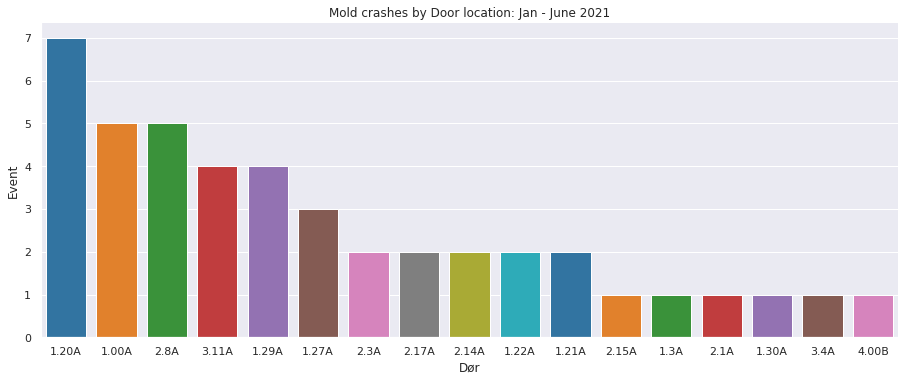

In [12]:
#Plotting the relationship between group type and mold crashes
sns.catplot(x='Dør', y='Event', data=door, kind='bar', height=5.0, aspect=2.5, palette='tab10')
plt.title('Mold crashes by Door location: Jan - June 2021')
plt.show()

#Molding temperatures Analysis

## Uploading necessary packages

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (12, 5)})

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

Saving pkksj4_2021.xlsx to pkksj4_2021 (2).xlsx


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df = pd.read_excel(io.BytesIO(uploaded['pkksj4_2021.xlsx']))

In [ ]:
df.head(2)

,Date,Time,Event,Weeknum,Weekday,Shift,State,Mass,Group,Product,Format,Trinn_7,Trinn_6,Trinn_5,Trinn_2,Trinn_1,Formvarmer,Kjølevann,Formhastighet,Skall_1,Skall_2,Kjøle_3,Kjøle_4,Kjøle_5,Kjøle_6,Kjøle_7,T_Karamell,Comment
0,2021-01-01,00:00:00,2021-01-01 00:00:00,1,Friday,Night,No_Shift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-01,01:00:00,2021-01-01 01:00:00,1,Friday,Night,No_Shift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           624 non-null    datetime64[ns]
 1   Time           744 non-null    object        
 2   Event          744 non-null    object        
 3   Weeknum        744 non-null    int64         
 4   Weekday        744 non-null    object        
 5   Shift          744 non-null    object        
 6   State          607 non-null    object        
 7   Mass           358 non-null    object        
 8   Group          358 non-null    object        
 9   Product        358 non-null    object        
 10  Format         358 non-null    object        
 11  Trinn_7        279 non-null    float64       
 12  Trinn_6        279 non-null    float64       
 13  Trinn_5        279 non-null    float64       
 14  Trinn_2        54 non-null     float64       
 15  Trinn_1        54 non-n

## Temperatures EDA

In [ ]:
#Creating a dataframe for the tempering data
cols = ['Trinn_2', 'Trinn_1', 'Formhastighet', 'Skall_1', 'Kjøle_3', 'T_Karamell', 'Comment']
df = df.drop(columns=cols, axis=1)
df = df[df['State'] == 'Operating'].reset_index(drop=True)
df.tail(3)

,Date,Time,Event,Weeknum,Weekday,Shift,State,Mass,Group,Product,Format,Trinn_7,Trinn_6,Trinn_5,Formvarmer,Kjølevann,Skall_2,Kjøle_4,Kjøle_5,Kjøle_6,Kjøle_7
276,2021-01-26,04:00:00,2021-01-26 04:00:00,5,Tuesday,Night,Operating,Svensk,Ingredienser,Daim_roll,2pk,29.4,27.2,27.5,34.9,12.4,33.9,5.8,9.6,6.4,8.1
277,2021-01-26,05:00:00,2021-01-26 05:00:00,5,Tuesday,Night,Operating,Svensk,Ingredienser,Daim_roll,2pk,28.4,26.8,27.4,34.4,13.4,33.9,7.1,10.2,6.0,8.2
278,2021-01-26,06:00:00,2021-01-26 06:00:00,5,Tuesday,Night,Operating,Svensk,Ingredienser,Daim_roll,2pk,29.1,27.1,27.5,34.8,12.9,34.3,6.0,9.5,6.5,8.1


In [ ]:
#Converting Event column to datetime and Weeknum to category dtype
df['Event'] = pd.to_datetime(df['Event'])
df['Weeknum'] = df['Weeknum'].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        279 non-null    datetime64[ns]
 1   Time        279 non-null    object        
 2   Event       279 non-null    datetime64[ns]
 3   Weeknum     279 non-null    category      
 4   Weekday     279 non-null    object        
 5   Shift       279 non-null    object        
 6   State       279 non-null    object        
 7   Mass        279 non-null    object        
 8   Group       279 non-null    object        
 9   Product     279 non-null    object        
 10  Format      279 non-null    object        
 11  Trinn_7     279 non-null    float64       
 12  Trinn_6     279 non-null    float64       
 13  Trinn_5     279 non-null    float64       
 14  Formvarmer  279 non-null    float64       
 15  Kjølevann   279 non-null    float64       
 16  Skall_2     279 non-null  

## Warm Zone EDA

In [ ]:
#Slicing dataframe to work with warm temperatures
temp = df[['Event', 'Formvarmer', 'Trinn_5', 'Trinn_6', 'Trinn_7']]
temp.tail(3)

,Event,Formvarmer,Trinn_5,Trinn_6,Trinn_7
276,2021-01-26 04:00:00,34.9,27.5,27.2,29.4
277,2021-01-26 05:00:00,34.4,27.4,26.8,28.4
278,2021-01-26 06:00:00,34.8,27.5,27.1,29.1


In [ ]:
#Computing the statistical analysis of the warm zone
temp.describe()

,Formvarmer,Trinn_5,Trinn_6,Trinn_7
count,279.000000,279.000000,279.000000,279.000000
mean,34.180287,28.385663,27.528315,28.862007
std,0.878114,0.700675,0.572217,0.685138
min,30.700000,26.600000,26.100000,27.700000
25%,33.700000,27.900000,27.100000,28.400000
50%,34.300000,28.200000,27.400000,28.600000
75%,34.800000,28.850000,28.000000,29.400000
max,35.900000,30.100000,29.100000,30.800000


In [ ]:
#Melting the dataframe into 1 identifier and 1 temperature column
temp = pd.melt(temp, id_vars='Event', var_name='Warm_zone', value_name='Temp', ignore_index=True)
temp.tail()

,Event,Warm_zone,Temp
1111,2021-01-26 02:00:00,Trinn_7,28.8
1112,2021-01-26 03:00:00,Trinn_7,28.4
1113,2021-01-26 04:00:00,Trinn_7,29.4
1114,2021-01-26 05:00:00,Trinn_7,28.4
1115,2021-01-26 06:00:00,Trinn_7,29.1


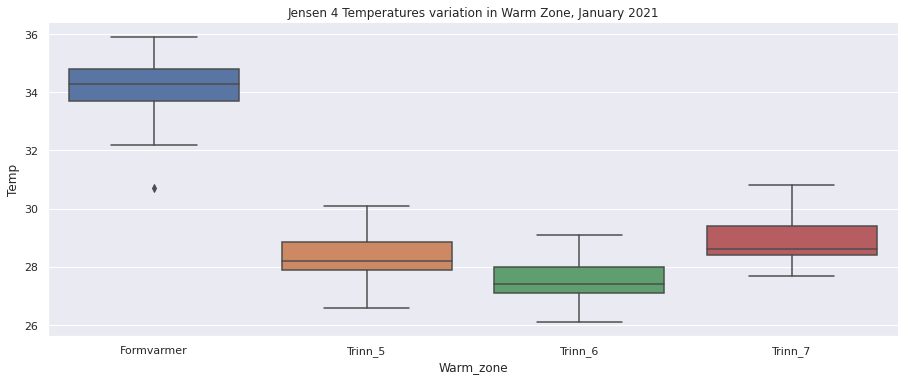

In [ ]:
#Plotting the warm zone temperatures variation
sns.catplot(data=temp, x='Warm_zone', y='Temp', kind='box', aspect=2.5 )
plt.title('Temperatures variation in Warm Zone, January 2021')
plt.show()

In [ ]:
#Grouping by Warm zone and calculating the mean 
temp[['Warm_zone', 'Temp']].groupby(by='Warm_zone').mean()

,Temp
Warm_zone,
Formvarmer,34.180287
Trinn_5,28.385663
Trinn_6,27.528315
Trinn_7,28.862007


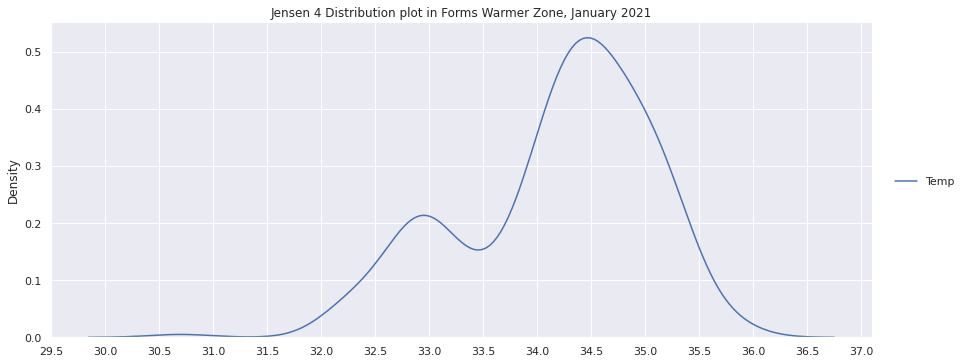

In [ ]:
#Distribution plot of forms warmer zone
sns.displot(data=temp[temp['Warm_zone'] == 'Formvarmer'], kind='kde', aspect=2.5)
plt.title('Distribution plot in Forms Warmer Zone, January 2021')
plt.xticks(np.arange(29.5, 37.5, step=0.5))
plt.show()

## Cooling Zone EDA

In [ ]:
#Slicing dataframe to work with cooling temperatures
cool = df[['Event', 'Kjølevann', 'Kjøle_7', 'Kjøle_4', 'Kjøle_5', 'Kjøle_6']]
cool.tail()

,Event,Kjølevann,Kjøle_7,Kjøle_4,Kjøle_5,Kjøle_6
274,2021-01-26 02:00:00,12.7,8.2,5.8,9.5,6.6
275,2021-01-26 03:00:00,11.6,8.0,6.0,9.5,5.5
276,2021-01-26 04:00:00,12.4,8.1,5.8,9.6,6.4
277,2021-01-26 05:00:00,13.4,8.2,7.1,10.2,6.0
278,2021-01-26 06:00:00,12.9,8.1,6.0,9.5,6.5


In [ ]:
#Computing the statistical analysis of the cooling zone
cool.describe()

,Kjølevann,Kjøle_7,Kjøle_4,Kjøle_5,Kjøle_6
count,279.000000,279.000000,279.000000,279.000000,279.000000
mean,12.086738,7.860215,6.673799,9.118495,7.850538
std,0.462636,0.514217,0.534267,0.834116,0.624838
min,10.400000,6.300000,5.800000,6.900000,5.500000
25%,11.900000,7.700000,6.100000,9.300000,7.500000
50%,12.000000,7.900000,6.900000,9.500000,7.900000
75%,12.250000,8.100000,7.100000,9.600000,8.400000
max,13.500000,10.500000,7.900000,10.300000,8.800000


In [ ]:
#Melting the dataframe into 1 identifier and 1 temperature column
cool = pd.melt(cool, id_vars='Event', var_name='Cool_zone', value_name='Temp', ignore_index=True)
cool.tail()

,Event,Cool_zone,Temp
1390,2021-01-26 02:00:00,Kjøle_6,6.6
1391,2021-01-26 03:00:00,Kjøle_6,5.5
1392,2021-01-26 04:00:00,Kjøle_6,6.4
1393,2021-01-26 05:00:00,Kjøle_6,6.0
1394,2021-01-26 06:00:00,Kjøle_6,6.5


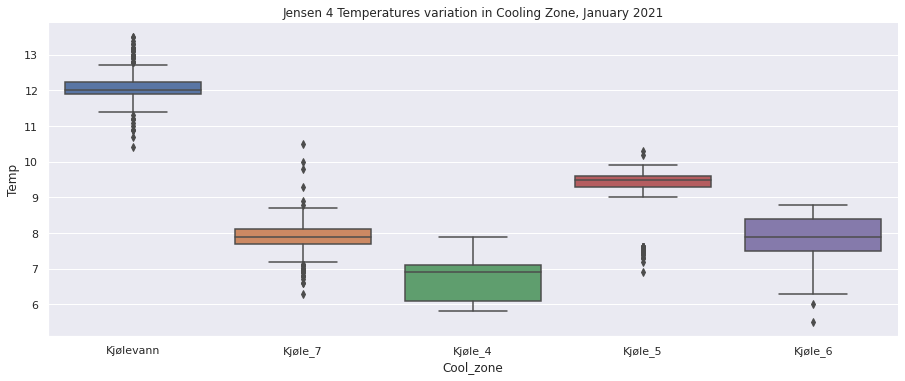

In [ ]:
#Plotting the cooling zone temperatures variation
sns.catplot(data=cool, x='Cool_zone', y='Temp', kind='box', aspect=2.5 )
plt.title('Temperatures variation in Cooling Zone, January 2021')
plt.show()

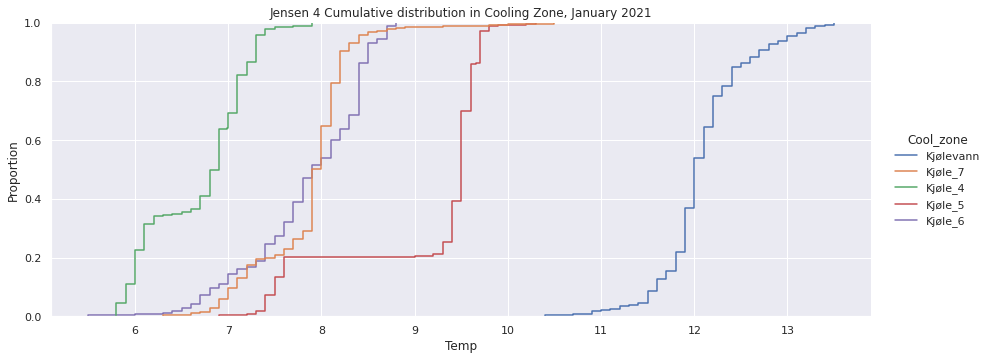

In [ ]:
#Distribution plot of cooling zone
sns.displot(data=cool, x='Temp', hue='Cool_zone', kind='ecdf', aspect=2.5)
plt.title('Cumulative distribution in Cooling Zone, January 2021')
plt.show()

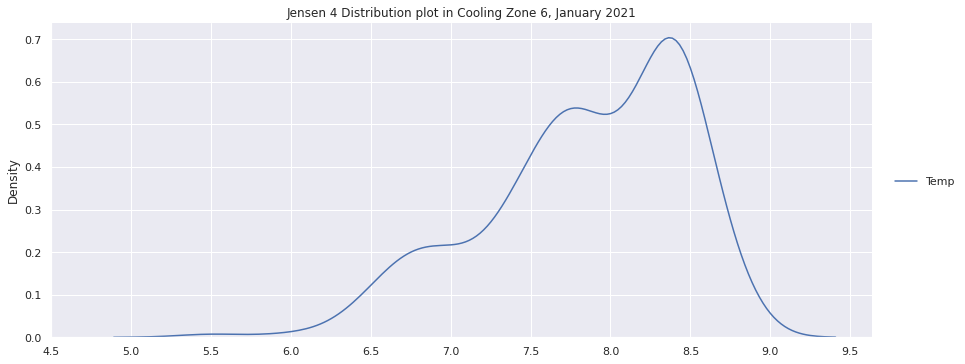

In [ ]:
#Distribution plot of cooling zone 6
sns.displot(data=cool[cool['Cool_zone'] == 'Kjøle_6'], kind='kde', aspect=2.5)
plt.title('Distribution plot in Cooling Zone 6, January 2021')
plt.xticks(np.arange(4.5, 10.0, step=0.5))
plt.show()

# Weight pieces historical analysis

## Uploading necessary packages

In [ ]:
#Customizing data visualization styles for Seaborn
sns.set_theme(rc = {'figure.figsize': (10, 5)})

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded7 = files.upload()

In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df7 = pd.read_excel(io.BytesIO(uploaded7['book3.xlsx']))

In [ ]:
#Check the header of the dataframe
df7.head(2)

,Part,Process,Shift,Employee,Lotkode-produkt,Best før dato-produkt,Date,Time,Gross_Weight,Fixed_Tare,Actual_Weight,Average_Weight,Shift_Average_Weight,Comment
0,00018452-melkerull74g,J4-støpeanlegg,Dag,"Ruud, Kim Rino",OGO0412041,2022-05-20 00:00:00,2021-05-20,08:46:36,76.76,2.2,74.56,74.563,74.569,NaN
1,00018452-melkerull74g,J4-støpeanlegg,Dag,"Ruud, Kim Rino",OGO0412041,2022-05-20 00:00:00,2021-05-20,08:46:36,76.34,2.2,74.14,NaN,NaN,NaN


In [ ]:
#Checking the dataframe info
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9910 entries, 0 to 9909
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Part                   9910 non-null   object        
 1   Process                9910 non-null   object        
 2   Shift                  9910 non-null   object        
 3   Employee               9910 non-null   object        
 4   Lotkode-produkt        9910 non-null   object        
 5   Best før dato-produkt  9910 non-null   object        
 6   Date                   9910 non-null   datetime64[ns]
 7   Time                   9910 non-null   object        
 8   Gross_Weight           9910 non-null   float64       
 9   Fixed_Tare             9910 non-null   float64       
 10  Actual_Weight          9910 non-null   float64       
 11  Average_Weight         991 non-null    float64       
 12  Shift_Average_Weight   991 non-null    float64       
 13  Com

## Pieces weights EDA

In [ ]:
#Creating a pandas dataframe for the gross weight and product types
weights = df7[['Part', 'Date', 'Time', 'Actual_Weight', 'Fixed_Tare', 'Gross_Weight']]
weights.tail(2)

,Part,Date,Time,Actual_Weight,Fixed_Tare,Gross_Weight
9908,00018452-melkerull74g,2020-06-19,10:23:29,74.07,2.2,76.27
9909,00018452-melkerull74g,2020-06-19,10:23:29,74.05,2.2,76.25


In [ ]:
#Assigning a new column to divide current time in hour slots
weights = weights.assign(Hours = lambda x: x['Time'].astype(str).str[:2])
weights.tail()

,Part,Date,Time,Actual_Weight,Fixed_Tare,Gross_Weight,Hours
9905,00018452-melkerull74g,2020-06-19,10:23:29,74.07,2.2,76.27,10
9906,00018452-melkerull74g,2020-06-19,10:23:29,74.07,2.2,76.27,10
9907,00018452-melkerull74g,2020-06-19,10:23:29,74.08,2.2,76.28,10
9908,00018452-melkerull74g,2020-06-19,10:23:29,74.07,2.2,76.27,10
9909,00018452-melkerull74g,2020-06-19,10:23:29,74.05,2.2,76.25,10


In [ ]:
#Checking the datatypes for consistency
weights.dtypes

Part                     object
Date             datetime64[ns]
Time                     object
Actual_Weight           float64
Fixed_Tare              float64
Gross_Weight            float64
Hours                    object
dtype: object

In [ ]:
#Counting the number of unique values for the Hours
weights.Hours.sort_values().unique()

array(['07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21'], dtype=object)

In [ ]:
#Getting the number of measurements performed for each hour
#weights.groupby(['Hours'])['Hours'].count()
weights['Hours'].value_counts()

10    1520
08    1320
13    1320
12    1230
09    1180
14    1180
07    1120
11     880
15      40
20      20
17      20
19      20
18      20
16      20
21      20
Name: Hours, dtype: int64

In [ ]:
#Getting the average weight of each product
piece_df = weights.groupby(['Part']).mean().reset_index()
piece_df

In [ ]:
#Statistical analysis of products weights
desc_df = weights.groupby(['Part'])['Actual_Weight', 'Gross_Weight'].describe().reset_index()
desc_df

In [ ]:
#Drop loose weight product and create categories for visualization
#weights = weights[~weights.isin({'Part': ['00409705-melkerullKaunas']})]
we_df = weights[weights['Part'] !='00409705-melkerullKaunas'].copy()
we_df = we_df.assign(Cat = np.where(we_df['Actual_Weight']>100,'2pk','single'))

In [ ]:
#Check the new dataframe info
we_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9880 entries, 0 to 9909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Part           9880 non-null   object        
 1   Date           9880 non-null   datetime64[ns]
 2   Time           9880 non-null   object        
 3   Actual_Weight  9880 non-null   float64       
 4   Fixed_Tare     9880 non-null   float64       
 5   Gross_Weight   9880 non-null   float64       
 6   Cat            9880 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 617.5+ KB


In [ ]:
#Plotting the weights distribution for the first category
sns.catplot(x='Part', y='Actual_Weight', data=we_df[we_df['Cat']=='single'], kind='box', height=5, aspect=3)
plt.title('Category Single')
plt.xticks(rotation=75)
plt.show()

In [ ]:
#Plotting the weights distribution for the second category
sns.catplot(x='Part', y='Actual_Weight', data=we_df[we_df['Cat']=='2pk'], kind='box', height=5, aspect=3)
plt.title('Category 2pk')
plt.xticks(rotation=75)
plt.show()

In [ ]:
#Exporting first dataframe to excel and into local disk
from google.colab import files
piece_df.to_excel('avg_piece_df.xlsx', index=False) #==> Excluding index from file
files.download('avg_piece_df.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Exporting second dataframe to excel and into local disk
from google.colab import files
desc_df.to_excel('describe_df.xlsx') #==> Excluding index from file
files.download('describe_df.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Weight by shift analysis

## Uploading necessary packages

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (8, 4)})

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df = pd.read_excel(io.BytesIO(uploaded['or_weights_2021.xlsx']))

In [ ]:
#Checking stored dataframe
df.tail(2)

,Date,Shift,Sample_roll,Machine,Grams
334,2021-01-14,Natt,16,PKM3,3.13
335,2021-01-14,Natt,16,PKM3,3.19


In [ ]:
#Checking dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         336 non-null    datetime64[ns]
 1   Shift        336 non-null    object        
 2   Sample_roll  336 non-null    int64         
 3   Machine      336 non-null    object        
 4   Grams        336 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 13.2+ KB


In [ ]:
#Performing basic statistical analysis of the data
df['Grams'].describe()

count    336.000000
mean       3.275476
std        0.096743
min        3.040000
25%        3.210000
50%        3.280000
75%        3.340000
max        3.800000
Name: Grams, dtype: float64

## EDA Choco Weight

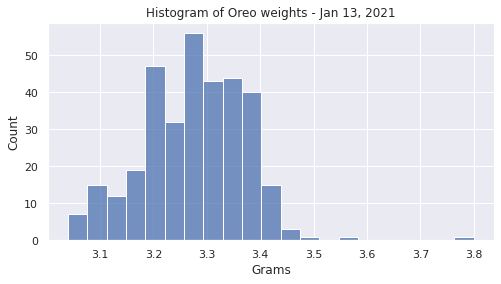

In [ ]:
#Plotting the histogram of the oreo weights
sns.histplot(data=df['Grams'])
plt.title('Histogram of Choco weights - Jan 13, 2021')
plt.show()

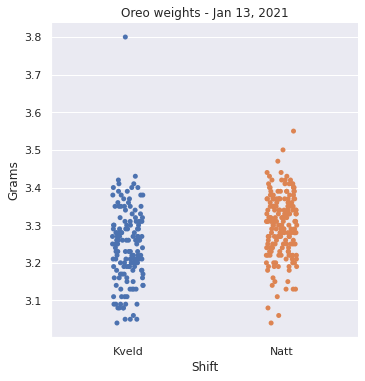

In [ ]:
#Plotting the strip plot of the oreo weights
sns.catplot(data=df, x='Shift', y='Grams')
plt.title('Choco weights - Jan 13, 2021')
plt.show()

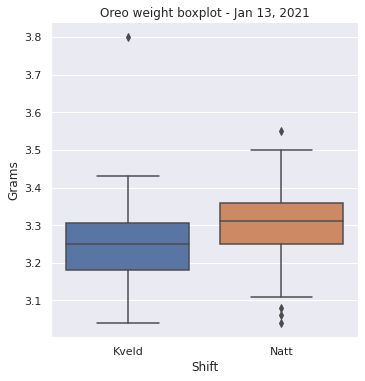

In [ ]:
#Plotting the Boxplot of the oreo weights
sns.catplot(data=df, x='Shift', y='Grams', kind='box')
plt.title('Choco weight boxplot - Jan 13, 2021')
plt.show()

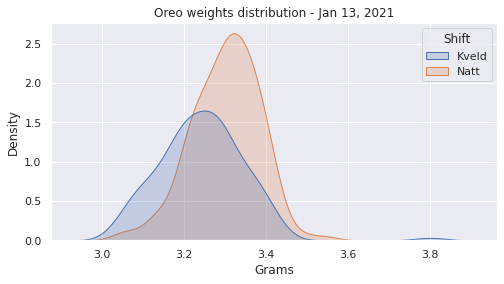

In [ ]:
#Plotting the Kdeplot of the oreo weights
sns.kdeplot(data=df, x='Grams', hue='Shift', shade=True)
plt.title('Choco weights distribution - Jan 13, 2021')
plt.show()

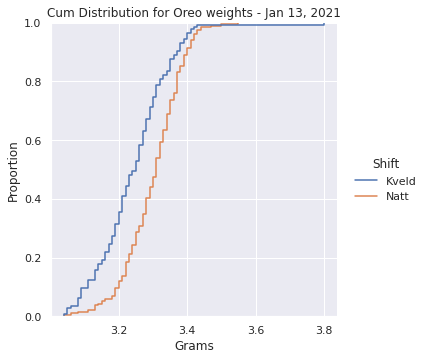

In [ ]:
#Plotting the cum distribution plot of the oreo weights
sns.displot(data=df, x='Grams', kind='ecdf', hue='Shift')
plt.title('Cum Distribution for Choco weights - Jan 13, 2021')
plt.show()

In [ ]:
#Grouping and computing the mean value by shift and roll
choco_mean = df.groupby(by=['Shift', 'Sample_roll']).mean().reset_index()
choco_mean

,Shift,Sample_roll,Grams
0,Kveld,1,3.246190
1,Kveld,2,3.274286
2,Kveld,6,3.265714
3,Kveld,8,3.217619
4,Kveld,10,3.233333
5,Kveld,11,3.203810
6,Kveld,14,3.258095
7,Natt,3,3.344762
8,Natt,4,3.317143
9,Natt,5,3.302857


In [ ]:
#Grouping and computing the sum of each roll and shift
choco_sum = df.groupby(by=['Shift', 'Sample_roll']).sum().reset_index()
choco_sum

,Shift,Sample_roll,Grams
0,Kveld,1,68.17
1,Kveld,2,68.76
2,Kveld,6,68.58
3,Kveld,8,67.57
4,Kveld,10,67.90
5,Kveld,11,67.28
6,Kveld,14,68.42
7,Natt,3,70.24
8,Natt,4,69.66
9,Natt,5,69.36


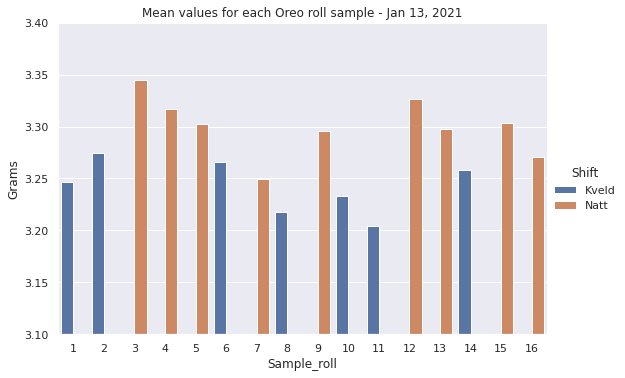

In [ ]:
#Plotting the mean values for each roll
sns.catplot(data=choco_mean, x='Sample_roll', y='Grams', kind='bar', hue='Shift', aspect=1.5)
plt.title('Mean values for each choco roll sample - Jan 13, 2021')
plt.ylim(3.10, 3.4)
plt.show()

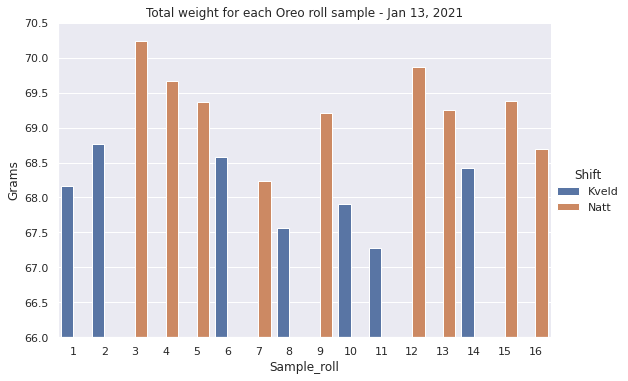

In [ ]:
#Plotting the mean values for each roll
sns.catplot(data=choco_sum, x='Sample_roll', y='Grams', kind='bar', hue='Shift', aspect=1.5)
plt.title('Total weight for each Oreo roll sample - Jan 13, 2021')
plt.ylim(66.00, 70.5)
plt.show()

## Statistical tests

In [ ]:
#Importing statistical package
from scipy import stats

In [ ]:
#1-sample t-test: testing the value of the population mean
stats.ttest_1samp(a=df['Grams'], popmean=3.19)

Ttest_1sampResult(statistic=16.195561147847144, pvalue=5.615434596274428e-44)

With a pvalue of 5.61e-44, we can infer that the population mean for oreo is not 3.19 grams

In [ ]:
#2-sample t-test: testing for difference across populations
afternoon = df[df['Shift'] == 'Kveld']['Grams']
night = df[df['Shift'] == 'Natt']['Grams']
stats.ttest_ind(a=afternoon, b=night)

Ttest_indResult(statistic=-5.727315280019941, pvalue=2.2764247210841586e-08)

With a pvalue of 2.27e-08, we can infer that the population mean between afternoon and night shift are different.

# Single product weight analysis

## Uploading necessary packages

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (12, 4)})

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded9 = files.upload()

Saving 2021-06-14_Weight.csv to 2021-06-14_Weight.csv


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df9 = pd.read_csv(io.BytesIO(uploaded9['2021-06-14_Weight.csv']), parse_dates=['Time'])

In [ ]:
#Checking stored dataframe
df9 = df9.rename(columns={'Heng': 'Gr'})
df9.tail(2)

,Time,Gr
69,2021-06-14 10:33:32.237,3.43
70,2021-06-14 10:33:42.304,3.11


In [ ]:
#Checking the dataframe information
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    71 non-null     datetime64[ns]
 1   Gr      71 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


In [ ]:
#Dropping outliers
df9 = df9[df9['Gr'] < 3.70].reset_index(drop=True)
df9.tail(2)

,Time,Gr
68,2021-06-14 10:33:32.237,3.43
69,2021-06-14 10:33:42.304,3.11


In [ ]:
#Performing statistical analysis of weight
df9['Gr'].describe()

count    70.000000
mean      3.253000
std       0.176425
min       2.830000
25%       3.152500
50%       3.235000
75%       3.350000
max       3.650000
Name: Gr, dtype: float64

## Single chocolate weight EDA

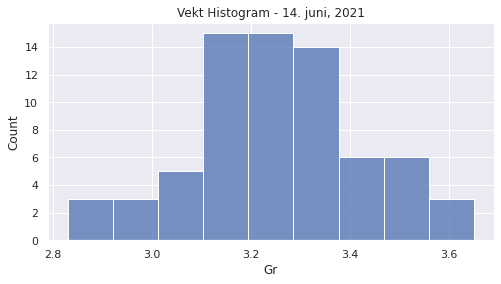

In [ ]:
#Plotting the histogram of the weights
sns.histplot(data=df9['Gr'])
plt.title('Vekt Histogram - 14. juni, 2021')
plt.show()

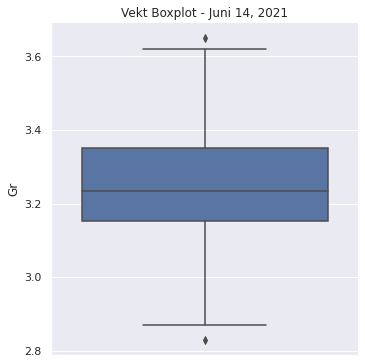

In [ ]:
#Plotting the Boxplot of the weights
sns.catplot(data=df9, y='Gr', kind='box')
plt.title('Vekt Boxplot - Juni 14, 2021')
plt.show()

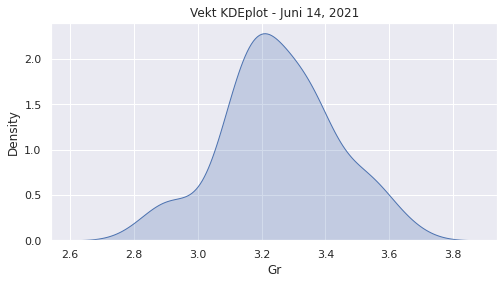

In [ ]:
#Plotting the KDEplot of the weights
sns.kdeplot(data=df9, x='Gr', shade=True)
plt.title('Vekt KDEplot - Juni 14, 2021')
plt.show()

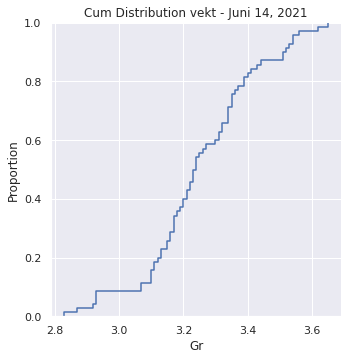

In [ ]:
#Plotting the cum distribution plot of the weights
sns.displot(data=df9, x='Gr', kind='ecdf')
plt.title('Cum Distribution vekt - Juni 14, 2021')
plt.show()

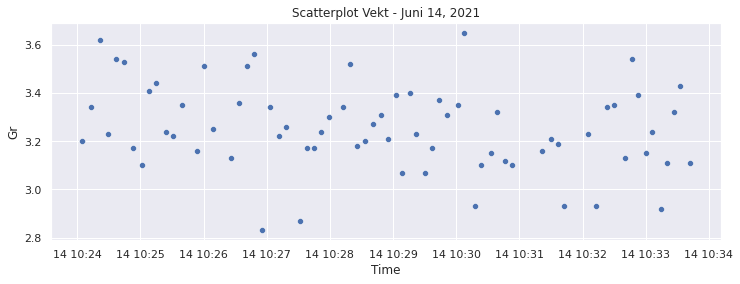

In [ ]:
#Plotting the scatter plot of weights against time
sns.scatterplot(data=df9, x='Time', y='Gr')
plt.title('Scatterplot Vekt - Juni 14, 2021')
plt.show()